# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns

In [2]:
#%matplotlib inline
from IPython.core.pylabtools import figsize
figsize(12, 8)
sns.set()

In [3]:
athletes = pd.read_csv("https://github.com/flother/rio2016/raw/master/athletes.csv")

In [4]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [8]:
# Sua análise começa aqui.
athletes.head(10)

,id,name,nationality,sex,date_of_birth,height,weight,sport,gold,silver,bronze,info
0,736041664,A Jesus Garcia,ESP,male,1969-10-17,1.72,64.0,athletics,0,0,0,NaN
1,532037425,A Lam Shin,KOR,female,1986-09-23,1.68,56.0,fencing,0,0,0,NaN
2,435962603,Aaron Brown,CAN,male,1992-05-27,1.98,79.0,athletics,0,0,1,NaN
3,521041435,Aaron Cook,MDA,male,1991-01-02,1.83,80.0,taekwondo,0,0,0,NaN
4,33922579,Aaron Gate,NZL,male,1990-11-26,1.81,71.0,cycling,0,0,0,NaN
5,173071782,Aaron Royle,AUS,male,1990-01-26,1.80,67.0,triathlon,0,0,0,NaN
6,266237702,Aaron Russell,USA,male,1993-06-04,2.05,98.0,volleyball,0,0,1,NaN
7,382571888,Aaron Younger,AUS,male,1991-09-25,1.93,100.0,aquatics,0,0,0,NaN
8,87689776,Aauri Lorena Bokesa,ESP,female,1988-12-14,1.80,62.0,athletics,0,0,0,NaN
9,997877719,Ababel Yeshaneh,ETH,female,1991-07-22,1.65,54.0,athletics,0,0,0,NaN


In [10]:
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 12 columns):
id               11538 non-null int64
name             11538 non-null object
nationality      11538 non-null object
sex              11538 non-null object
date_of_birth    11538 non-null object
height           11208 non-null float64
weight           10879 non-null float64
sport            11538 non-null object
gold             11538 non-null int64
silver           11538 non-null int64
bronze           11538 non-null int64
info             131 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 1.1+ MB


In [14]:
athletes.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,11538,NaN,NaN,NaN,4.99989e+08,2.90865e+08,18347,2.451e+08,5.00201e+08,7.53987e+08,9.99988e+08
name,11538,11517,Mohamed Amer,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nationality,11538,207,USA,567,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,11538,2,male,6333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_of_birth,11538,5595,1993-02-18,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
height,11208,NaN,NaN,NaN,1.76626,0.112656,1.21,1.69,1.76,1.84,2.18
weight,10879,NaN,NaN,NaN,72.0682,16.1773,31,60,70,81,170
sport,11538,28,athletics,2363,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gold,11538,NaN,NaN,NaN,0.0577223,0.25591,0,0,0,0,5
silver,11538,NaN,NaN,NaN,0.0567689,0.239147,0,0,0,0,2


## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [92]:
def q1():
    # Retorne aqui o resultado da questão 1.
    smp = get_sample(athletes, 'height', n=3000)
    sh_stat, sh_pval = sct.shapiro(smp)
    return bool(sh_pval > .05)

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

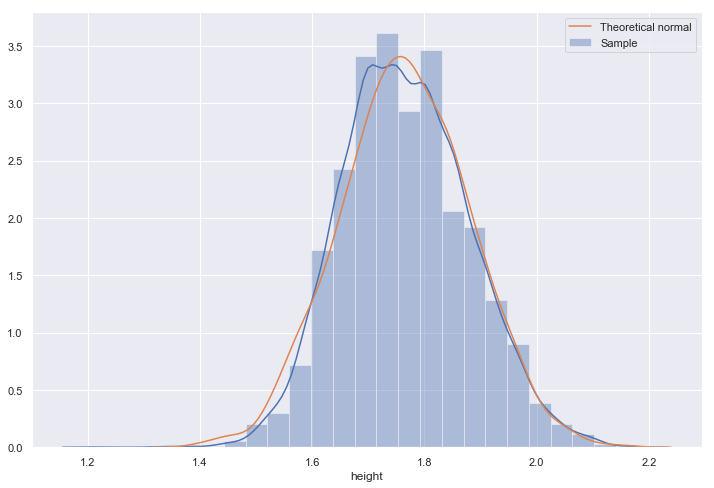

In [58]:
sns.distplot(athletes['height'].dropna(), label='Sample', bins=25)
sns.kdeplot(np.random.normal(athletes['height'].mean(), athletes['height'].std(), 3000), label='Theoretical normal')

Text(0.5, 1.0, 'Q-Q plot to normal distribution')

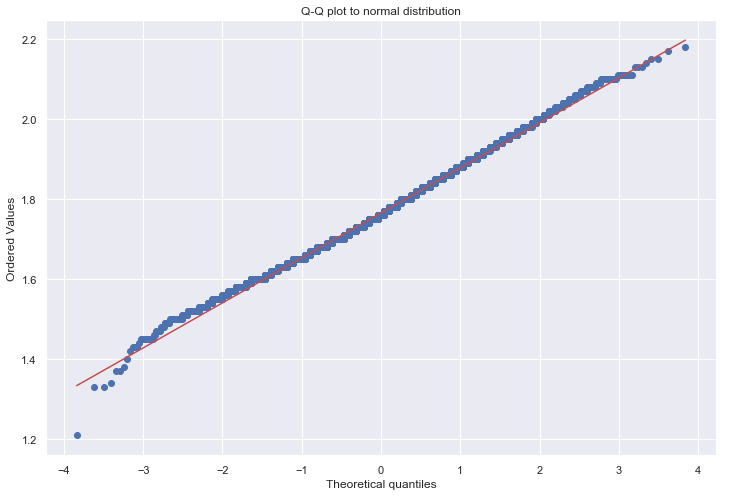

In [83]:
sct.probplot(athletes['height'].dropna(), plot=plt)
plt.title('Q-Q plot to normal distribution')

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [91]:
def q2():
    # Retorne aqui o resultado da questão 2.
    smp = get_sample(athletes, 'height', n=3000)
    jb_stat, jb_pval = sct.jarque_bera(smp)
    return bool(jb_pval > .05)

__Para refletir__:

* Esse resultado faz sentido?

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [93]:
def q3():
    # Retorne aqui o resultado da questão 3.
    smp = get_sample(athletes, 'weight', n=3000)
    dp_stat, dp_pval = sct.normaltest(smp)
    return bool(dp_pval > .05)

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

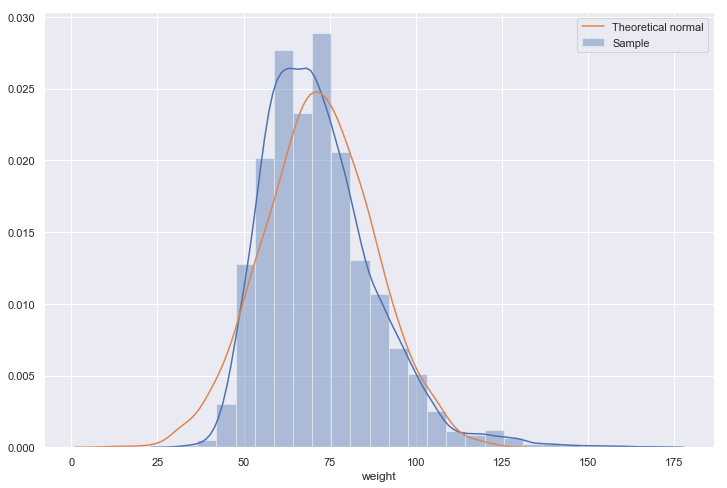

In [59]:
sns.distplot(athletes['weight'].dropna(), label='Sample', bins=25)
sns.kdeplot(np.random.normal(athletes['weight'].mean(), athletes['weight'].std(), 3000), label='Theoretical normal')

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [96]:
def q4():
    # Retorne aqui o resultado da questão 4.
    smp = np.log(get_sample(athletes, 'weight', n=3000))
    dp_stat, dp_pval = sct.normaltest(smp)
    return bool(dp_pval > .05)

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

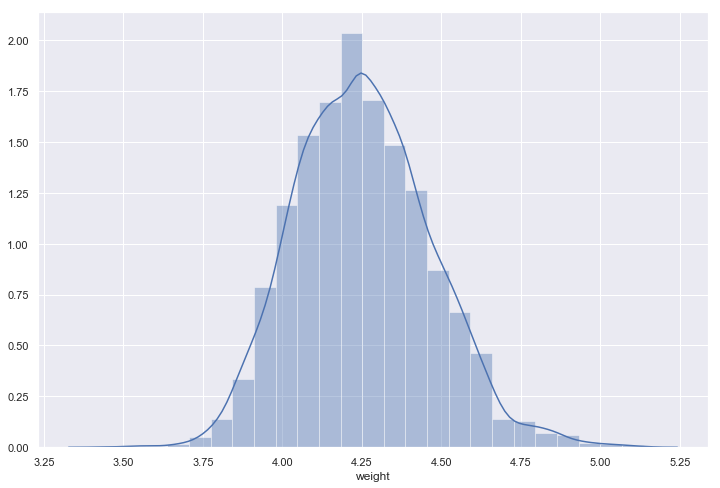

In [61]:
sns.distplot(np.log(athletes['weight'].dropna()), label='Sample', bins=25)

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [4]:
bra, usa, can = athletes.query("nationality == 'BRA'"),\
                athletes.query("nationality == 'USA'"),\
                athletes.query("nationality == 'CAN'")

In [106]:
def q5():
    # Retorne aqui o resultado da questão 5.
    ttest_stat, ttest_pval = sct.ttest_ind(bra['height'], usa['height'], equal_var=False, nan_policy='omit')
    return bool(ttest_pval > .05)

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [107]:
def q6():
    # Retorne aqui o resultado da questão 6.
    ttest_stat, ttest_pval = sct.ttest_ind(bra['height'], can['height'], equal_var=False, nan_policy='omit')
    return bool(ttest_pval > .05)

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [8]:
def q7():
    # Retorne aqui o resultado da questão 7.
    ttest_stat, ttest_pval = sct.ttest_ind(usa['height'], can['height'], equal_var=False, nan_policy='omit')
    return round(float(ttest_pval), 8)

0.00054376

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?

Text(0.5, 0, 'Values')

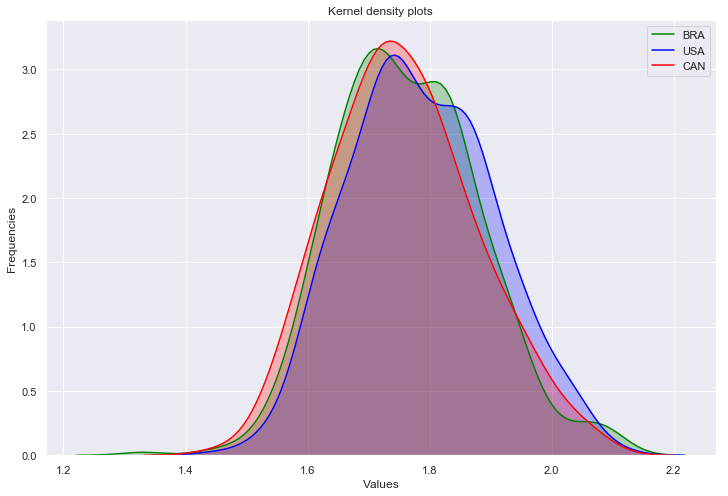

In [81]:
sns.kdeplot(bra['height'].dropna(), shade=True, label='BRA', color='green')
sns.kdeplot(usa['height'].dropna(), shade=True, label='USA', color='blue')
sns.kdeplot(can['height'].dropna(), shade=True, label='CAN', color='red')
plt.title('Kernel density plots')
plt.ylabel('Frequencies')
plt.xlabel('Values')